In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.cross_validation import train_test_split

# Load data from scikit-learn
X, y = make_moons(n_samples=500, random_state=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

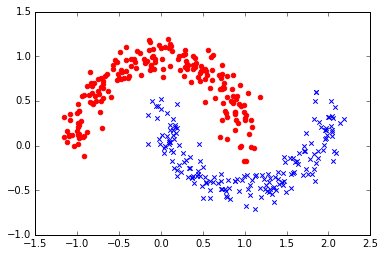

In [2]:
y0 = np.where( y_train==0 )
y1 = np.where( y_train==1 )
plt.scatter( X_train[y0,0], X_train[y0,1], color='red', marker='o' )
plt.scatter( X_train[y1,0], X_train[y1,1], color='blue', marker='x' )
plt.show()

In [3]:
import NeuralNetwork as nn

# two-layer(input-hidden-output) neural network
num_units = [2, 3, 3, 2]
model = nn.NeuralNetwork( num_units, eta=0.01, epochs=100, activation_function='tanh', minibatch_size=X_train.shape[0], bShuffle=True, random_state=None, verbose=True )
model.initialize_weights()
model.train( X_train, y_train, X_test, y_test )

Epoch 1 out of 100 is done...
Epoch 2 out of 100 is done...
Epoch 3 out of 100 is done...
Epoch 4 out of 100 is done...
Epoch 5 out of 100 is done...
Epoch 6 out of 100 is done...
Epoch 7 out of 100 is done...
Epoch 8 out of 100 is done...
Epoch 9 out of 100 is done...
Epoch 10 out of 100 is done...
Epoch 11 out of 100 is done...
Epoch 12 out of 100 is done...
Epoch 13 out of 100 is done...
Epoch 14 out of 100 is done...
Epoch 15 out of 100 is done...
Epoch 16 out of 100 is done...
Epoch 17 out of 100 is done...
Epoch 18 out of 100 is done...
Epoch 19 out of 100 is done...
Epoch 20 out of 100 is done...
Epoch 21 out of 100 is done...
Epoch 22 out of 100 is done...
Epoch 23 out of 100 is done...
Epoch 24 out of 100 is done...
Epoch 25 out of 100 is done...
Epoch 26 out of 100 is done...
Epoch 27 out of 100 is done...
Epoch 28 out of 100 is done...
Epoch 29 out of 100 is done...
Epoch 30 out of 100 is done...
Epoch 31 out of 100 is done...
Epoch 32 out of 100 is done...
Epoch 33 out of 1

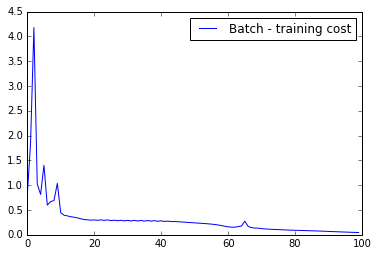

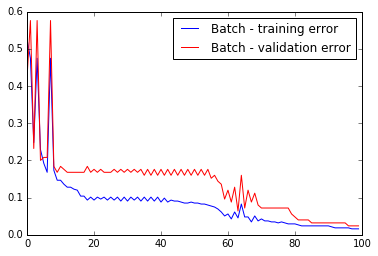

In [4]:
%matplotlib inline
fig1, = plt.plot( model.training_cost )
plt.legend( [fig1], ["Batch - training cost"] )
plt.show()

fig2, = plt.plot( model.training_error, color='b' )
fig3, = plt.plot( model.validation_error, color='r' )
plt.legend([fig2, (fig2, fig3)], ["Batch - training error", "Batch - validation error"])
plt.show()

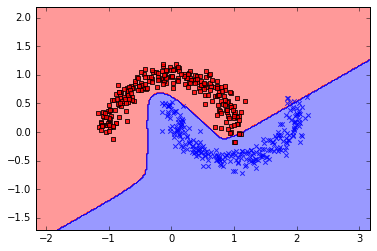

In [5]:
model.plot_decision_regions(X, y)

In [6]:
num_units = [2, 3, 3, 2]
model_sgd = nn.NeuralNetwork( num_units, eta=0.01, epochs=100, activation_function='tanh', minibatch_size=16, bShuffle=True, random_state=None, verbose=True )
model_sgd.initialize_weights()
model_sgd.train( X_train, y_train, X_test, y_test )

Epoch 1 out of 100 is done...
Epoch 2 out of 100 is done...
Epoch 3 out of 100 is done...
Epoch 4 out of 100 is done...
Epoch 5 out of 100 is done...
Epoch 6 out of 100 is done...
Epoch 7 out of 100 is done...
Epoch 8 out of 100 is done...
Epoch 9 out of 100 is done...
Epoch 10 out of 100 is done...
Epoch 11 out of 100 is done...
Epoch 12 out of 100 is done...
Epoch 13 out of 100 is done...
Epoch 14 out of 100 is done...
Epoch 15 out of 100 is done...
Epoch 16 out of 100 is done...
Epoch 17 out of 100 is done...
Epoch 18 out of 100 is done...
Epoch 19 out of 100 is done...
Epoch 20 out of 100 is done...
Epoch 21 out of 100 is done...
Epoch 22 out of 100 is done...
Epoch 23 out of 100 is done...
Epoch 24 out of 100 is done...
Epoch 25 out of 100 is done...
Epoch 26 out of 100 is done...
Epoch 27 out of 100 is done...
Epoch 28 out of 100 is done...
Epoch 29 out of 100 is done...
Epoch 30 out of 100 is done...
Epoch 31 out of 100 is done...
Epoch 32 out of 100 is done...
Epoch 33 out of 1

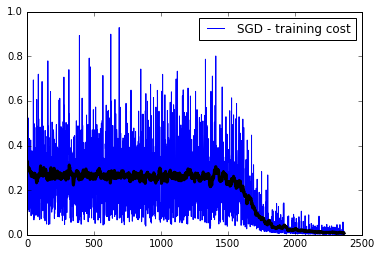

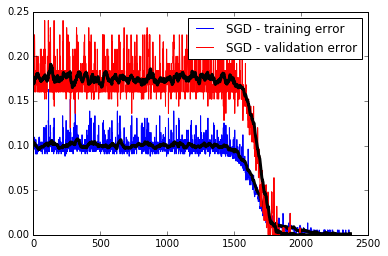

In [7]:
# smoothing window size
sws = 30
smoothed_cost = np.convolve(model_sgd.training_cost, np.ones(sws)/sws)
smoothed_train_error = np.convolve(model_sgd.training_error, np.ones(sws)/sws)
smoothed_val_error = np.convolve(model_sgd.validation_error, np.ones(sws)/sws)

%matplotlib inline
fig1, = plt.plot( model_sgd.training_cost[sws+1:] )
plt.plot( smoothed_cost[sws+1:-sws], color='k', linewidth=3.0 )
plt.legend( [fig1], ["SGD - training cost"] )
plt.show()

fig2, = plt.plot( model_sgd.training_error[sws+1:], color='b' )
plt.plot( smoothed_train_error[sws+1:-sws], color='k', linewidth=3.0 )
fig3, = plt.plot( model_sgd.validation_error[sws+1:], color='r' )
plt.plot( smoothed_val_error[sws+1:-sws], color='k', linewidth=3.0 )
plt.legend([fig2, (fig2, fig3)], ["SGD - training error", "SGD - validation error"])
plt.show()

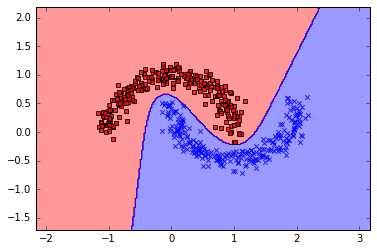

In [8]:
model_sgd.plot_decision_regions(X, y)